## [``dyce``](https://posita.github.io/dyce/) translation of the accepted answer to “[Roll and Keep in Anydice?](https://rpg.stackexchange.com/a/166637)”

Select ``Run All Cells`` from the ``Run`` menu above.

In [1]:
# Install additional requirements if necessary
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    try:
        import anydyce
    except (ImportError, ModuleNotFoundError):
        requirements = ["anydyce~=0.2.0"]
        try:
            import piplite ; await piplite.install(requirements)
        except ImportError:
            import pip ; pip.main(["install"] + requirements)
    import anydyce

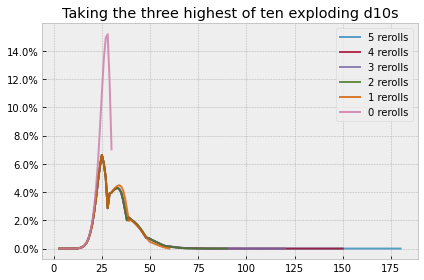

In [2]:
import matplotlib.pyplot
import matplotlib.style
from dyce import H, P
from dyce.evaluation import explode
from anydyce.viz import plot_line

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.style.use("bmh")
ax = matplotlib.pyplot.axes()
plot_line(
    ax,
    [
        (f"{depth} rerolls", (10 @ P(explode(H(10), limit=depth))).h(slice(-3, None)))
        for depth in range(5, -1, -1)
    ],
)

for line in ax.lines:
    line.set_marker("")

ax.legend()
ax.set_title("Taking the three highest of ten exploding d10s")
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()